# Affinity Analysis for 3 Items

## Things to do:
1. Using `ReducedData.csv` to complete the following tasks.
2. Only need to generate / recommend rules that contains three items like A, B -> C.
3. Support and Confidence function need to be flexible to take any number of items (1, 2 and 3) as input.

### Part A: Write down a statement that best describes the support of rules containing three items at a time.

### Part B: Write down a statement that best describes the confidence of rules containing three items at a time. i.e. given x and Y, a transaction also contains Z.  

### Part C: Calculating the support and confidence of rules containing three items at a time.

#### Loading the dataset

In [1]:
##Importing pandas and numpy libraries for data analysis
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
market_basket = pd.read_csv("ReducedData.csv")
print("The shape of our dataset is: ", market_basket.shape)

The shape of our dataset is:  (2897, 12)


In [3]:
#Viewing some transactions from dataset
market_basket.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1228,29046618323,157,20000,1,3.49,3313,0.00,2213,23,0.0,0.0
1,358,30707611686,247,20000,1,3.49,3266,0.00,1211,36,0.0,0.0
2,1675,30760265177,250,20000,1,0.99,3235,0.00,936,36,0.0,0.0
3,1420,30591251330,238,20000,1,1.54,3297,0.00,1342,35,0.0,0.0
4,486,30636771192,242,20000,2,1.98,3217,-0.52,1411,35,0.0,0.0


In [4]:
##Viewing the dataset information to check if any values are
##missing, and if cleaning of data is needed or not.
market_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 12 columns):
household_key        2897 non-null int64
BASKET_ID            2897 non-null int64
DAY                  2897 non-null int64
PRODUCT_ID           2897 non-null int64
QUANTITY             2897 non-null int64
SALES_VALUE          2897 non-null float64
STORE_ID             2897 non-null int64
RETAIL_DISC          2897 non-null float64
TRANS_TIME           2897 non-null int64
WEEK_NO              2897 non-null int64
COUPON_DISC          2897 non-null float64
COUPON_MATCH_DISC    2897 non-null float64
dtypes: float64(4), int64(8)
memory usage: 271.7 KB


In [5]:
##Please run this if some issues with list occured
##del list

In [6]:
#Exploring the unique values of each attribute
#Basket Id
print("Number of unique baskets: ", market_basket["BASKET_ID"].nunique())
print("")
print("List of baskets:")
print(list(market_basket["BASKET_ID"].unique()))

Number of unique baskets:  445

List of baskets:
[29046618323, 30707611686, 30760265177, 30591251330, 30636771192, 28802746690, 28517258574, 30192611948, 29224467440, 27855602541, 28273880965, 27831937999, 30754188706, 27556417706, 29776317638, 29872791599, 30178790946, 30945992558, 30753603617, 28273822100, 31228403163, 31556442723, 28924865555, 28924940887, 30590003347, 30590802826, 30733637259, 30755292776, 29302845385, 28420456264, 31272000346, 27819482409, 27639966001, 27788516169, 27955721015, 28201395124, 28297071931, 28420685198, 28641796466, 28800976041, 29197667908, 29531076594, 29531116865, 29605285324, 30410207512, 30734102880, 30795606757, 30809507676, 31363387658, 31726100030, 31821525458, 29776325834, 31737620069, 27820100290, 28701110908, 30589387198, 31175820216, 31415760478, 29394340357, 30678270067, 31147666000, 28031017875, 30809521071, 30192607229, 29605491530, 28802065855, 31049323325, 30063010494, 27676201390, 27904040658, 29332931401, 30179005324, 31532440635, 3

In [7]:
#Product Id
print("Number of unique products: ", market_basket["PRODUCT_ID"].nunique())
print("List of products:")
print(list(market_basket["PRODUCT_ID"].unique()))

Number of unique products:  19
List of products:
[20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]


In [8]:
market_basket.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.00000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,1294.228167,2.950533e+10,178.586469,75702.450811,7.74767,2.596672,3226.714877,-0.395796,1528.498101,26.215740,-0.007491,-0.000880
std,549.546651,1.349419e+09,83.711980,45571.855685,245.74898,2.512785,66.204246,1.049139,450.993239,11.991741,0.079596,0.020016
min,2.000000,2.702365e+10,4.000000,20000.000000,0.00000,0.000000,3027.000000,-23.840000,105.000000,1.000000,-1.100000,-0.500000
25%,997.000000,2.822519e+10,104.000000,40000.000000,1.00000,1.220000,3182.000000,-0.480000,1223.000000,16.000000,0.000000,0.000000
50%,1338.000000,2.943905e+10,182.000000,60000.000000,1.00000,2.000000,3235.000000,0.000000,1555.000000,27.000000,0.000000,0.000000
75%,1675.000000,3.075360e+10,246.000000,100000.000000,1.00000,2.990000,3274.000000,0.000000,1907.000000,36.000000,0.000000,0.000000
max,2498.000000,3.187184e+10,328.000000,200000.000000,9966.00000,41.860000,3313.000000,0.000000,2359.000000,48.000000,0.000000,0.000000


In [9]:
#Lets check if the basket was used in the same or different days
#One basket is used in same day i.e. the products are bought on same day 
groupby_basket = pd.DataFrame(market_basket.groupby("BASKET_ID")["DAY"].nunique())
groupby_basket.head()

,DAY
BASKET_ID,
27023651934,1
27083807604,1
27179351086,1
27195527245,1
27236697825,1


In [10]:
#getting unique ProductID number per basket by a customer (Unique products in each basket)
groupby_basket = pd.DataFrame(market_basket.groupby("BASKET_ID")["PRODUCT_ID"].nunique())
groupby_basket.columns=["PRODUCTS_NUMBER"]
groupby_basket.head()

,PRODUCTS_NUMBER
BASKET_ID,
27023651934,7
27083807604,1
27179351086,3
27195527245,1
27236697825,1


In [12]:
##Most bought product
groupedProduct = market_basket.groupby("PRODUCT_ID",as_index= False)['QUANTITY'].sum().sort_values(by='QUANTITY', ascending=False)
groupedProduct.head(5)

,PRODUCT_ID,QUANTITY
18,200000,18757
2,40000,589
1,30000,408
3,50000,405
5,70000,307


In [13]:
##Checking how many products are there in each baskets
invoice_quantity= market_basket.groupby('BASKET_ID', as_index=False)['QUANTITY'].sum().sort_values(by='QUANTITY', ascending=False)
invoice_quantity.head()

,BASKET_ID,QUANTITY
70,27939429951,9966
61,27891416371,8703
401,31272000346,75
54,27855602541,72
324,30591251330,72


In [14]:
##Creating dictionary where keys are the Basket ID and values are the Products that are bought during each transactions.
##A basket contains repeatative products, we will filter it out later on.
Basket_dictionary = market_basket.groupby('BASKET_ID')['PRODUCT_ID'].apply(list).to_dict()
print(Basket_dictionary)

{27023651934: [30000, 40000, 50000, 70000, 70000, 100000, 110000, 120000], 27083807604: [120000], 27179351086: [30000, 70000, 70000, 140000], 27195527245: [30000], 27236697825: [100000], 27288377026: [40000, 40000, 40000, 110000], 27316546915: [40000, 70000, 90000, 90000, 100000, 120000], 27360107324: [50000, 50000, 60000, 60000, 80000, 110000, 120000, 120000, 130000, 190000], 27360107597: [60000, 140000], 27361431746: [30000, 40000, 50000, 60000, 80000, 80000, 100000, 110000], 27361431855: [200000], 27386635643: [30000, 40000, 40000, 40000, 40000, 50000, 60000, 70000, 70000, 90000, 110000, 120000, 120000, 120000, 120000, 130000, 140000, 140000, 150000, 160000], 27404676049: [40000], 27404686350: [30000, 30000, 40000, 40000, 50000, 50000, 50000, 50000, 60000, 70000, 70000, 70000, 80000, 80000, 80000, 80000, 90000, 90000, 90000, 110000, 110000, 110000, 120000, 130000, 130000, 130000, 150000, 160000, 170000, 170000, 190000, 190000, 190000, 200000, 200000], 27424130878: [120000], 27447773

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket():
    basketProcess = market_basket.groupby(['BASKET_ID','PRODUCT_ID'])['QUANTITY'].sum().unstack().reset_index().fillna(0).set_index('BASKET_ID')
    return basketProcess

In [16]:
##1-hot encoding an items
basketShow = create_basket()
basket_sets = basketShow.applymap(encode_units)
basket_sets.head()

PRODUCT_ID,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000
BASKET_ID,,,,,,,,,,,,,,,,,,,
27023651934,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0
27083807604,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27179351086,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
27195527245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27236697825,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Print transactions 

Print the first five rows of the dataset to get a sense of what the dataset looks like. The result will show you which items were bought in the first five transactions listed

In [17]:
##Dataset before pre-processing (Displaying the 5 top transactions)
market_basket.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1228,29046618323,157,20000,1,3.49,3313,0.00,2213,23,0.0,0.0
1,358,30707611686,247,20000,1,3.49,3266,0.00,1211,36,0.0,0.0
2,1675,30760265177,250,20000,1,0.99,3235,0.00,936,36,0.0,0.0
3,1420,30591251330,238,20000,1,1.54,3297,0.00,1342,35,0.0,0.0
4,486,30636771192,242,20000,2,1.98,3217,-0.52,1411,35,0.0,0.0


In [18]:
##Dataset after pre-processing to calculate rules, support and confidence
basket_sets.head(5)

PRODUCT_ID,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000
BASKET_ID,,,,,,,,,,,,,,,,,,,
27023651934,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0
27083807604,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27179351086,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
27195527245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27236697825,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Creating a function `to compute the Support and Confidence`

{20000: 113, 30000: 177, 40000: 213, 50000: 162, 60000: 140, 70000: 156, 80000: 137, 90000: 136, 100000: 128, 110000: 115, 120000: 108, 130000: 64, 140000: 32, 150000: 29, 160000: 39, 170000: 44, 180000: 13, 190000: 38, 200000: 67}


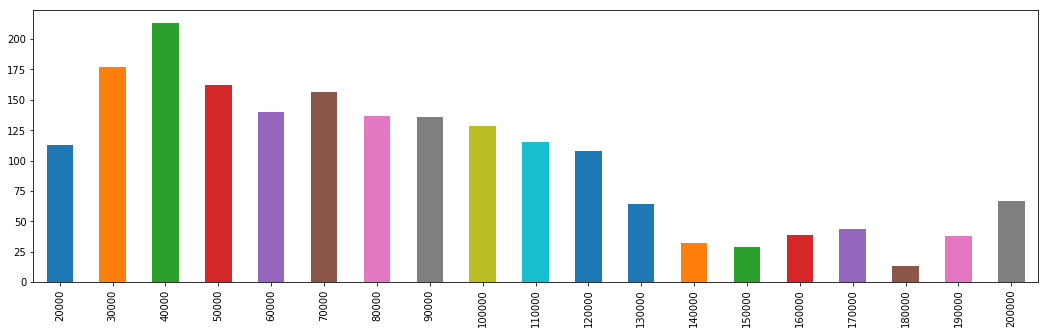

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 5)
##Before actual implementation, lets see support(Popularity) for each products
##calculate support for every product in all transactions
product_support_dict = {}
for column in basket_sets.columns:
    product_support_dict[column] = sum(basket_sets[column]>0)
print(product_support_dict)    
# visualise support
pd.Series(product_support_dict).plot(kind="bar")

In [20]:
##total number of transactions 
totalTransactions = market_basket.BASKET_ID.nunique()

##Method to calculate support 
##It accepts combinationsThree as a parameter which is a 
##Combinations of itemsets that are present in the transactions
def calculateSupport(combinationsThree):
    validRules = 0
    ##if 3 combination of itemset is given, this will execute
    if len(combinationsThree) == 3:
        for index, row in basket_sets.iterrows():
            if row[combinationsThree[0]] >0 and row[combinationsThree[1]] > 0 and row[combinationsThree[2]]> 0:
                validRules += 1
        return (validRules/totalTransactions)*100
    
    ##if 2 combination of itemset is given, this will execute
    elif len(combinationsThree) == 2:
        for index, row in basket_sets.iterrows():
            if row[combinationsThree[0]] >0 and row[combinationsThree[1]] > 0:
                validRules += 1
        return (validRules/totalTransactions)*100
    
    ##if 1 itemset is given, this will execute
    elif len(combinationsThree) == 1:
        for index, row in basket_sets.iterrows():
            if row[combinationsThree[0]] >0:
                validRules += 1
        return (validRules/totalTransactions)*100
    
    elif (len(combinationsThree)>3):
        return 0  

In [21]:
##Method to calculate confidence
def calculateConfidence(combinationsThree):
    if (calculateSupport(combinationsThree[:2])) != 0:
        confidence = (calculateSupport(combinationsThree)/calculateSupport(combinationsThree[:2]))*100
    else:
        confidence = 0
    return confidence

#### Compute the support and confidence for all possible rules in the dataset using the above function

In [51]:
##importing itertools library to find combinations between itemsets
##First the combinations of two products are generated and the third
##product is added to produce a list of three itemsets.
from itertools import combinations
def findCombinations():
    uniqueProducts = market_basket.PRODUCT_ID.unique()
    combinationsTwo = combinations(uniqueProducts,2)
    combinationsThree = []
    for value1 in combinationsTwo:
        for value2 in uniqueProducts:
            if value2 not in value1:
                combinationsThree.append(value1 + (value2, ))
    return combinationsThree 

In [52]:
##This will add the support, confidence of all the combinations
##Of the products generated by findCombinations() method in the list
##Since lists are in orders, the rules, support and confidence are
##Printed in order
supportList = []
confidenceList = []
getRules = findCombinations()
for gRule in getRules:
    supportList.append(calculateSupport(gRule))
    confidenceList.append(calculateConfidence(gRule))

#### Creating a function `print_rule` that will print out the rules in a readable format

In [53]:
##Print rule function which prints the rules in readable formats
##Here, i have used a tabular structure where combination of 3 itemsets with support, 
##and confidence are shown using Dataframe

def print_rule():
    printData = pd.DataFrame(data = {'Association Rules':getRules, 'Support is':supportList,'Confidence is':confidenceList})
    return printData

#### Testing the function

Calling the print_rule function to report the support confidence statistics on the rule.

In [54]:
##For all the rules combinations
##This displays the table with 3 columns where column 1 contains
##Rules in the form of (A, B, C) which means (A, B) --->> (C)
##Column 2 contains support and column 3 contains confidences.
##Example :: (20000,30000,40000) ===> (20000,30000)-->(40000)
print_rule()

,Association Rules,Support is,Confidence is
0,"(20000, 30000, 40000)",12.134831,87.096774
1,"(20000, 30000, 50000)",9.887640,70.967742
2,"(20000, 30000, 60000)",6.741573,48.387097
3,"(20000, 30000, 70000)",10.112360,72.580645
4,"(20000, 30000, 80000)",8.764045,62.903226
5,"(20000, 30000, 90000)",7.191011,51.612903
6,"(20000, 30000, 100000)",8.089888,58.064516
7,"(20000, 30000, 110000)",8.764045,62.903226
8,"(20000, 30000, 120000)",5.617978,40.322581
9,"(20000, 30000, 130000)",3.370787,24.193548


### Part D: Sorting the rules derived in Part C according to support and print the top 5.

In [56]:
##Sorting on the basis of support
##Along with rules, support, confidence are also displayed 
##from higher value to lower value
printData = pd.DataFrame(data = {'Association Rule':getRules, 'Support is':supportList, 'Confidence is':confidenceList})
printData = printData.sort_values(by='Support is', ascending=False)
printData.head()

,Association Rule,Support is,Confidence is
596,"(40000, 50000, 30000)",17.303371,67.543860
307,"(30000, 40000, 50000)",17.303371,70.000000
324,"(30000, 50000, 40000)",17.303371,85.555556
598,"(40000, 50000, 70000)",15.505618,60.526316
886,"(50000, 70000, 40000)",15.505618,86.250000


### Part E: Sorting the rules derived in Part C according to confidence and print the top 5

In [57]:
##Sorting on the basis of confidence
##Along with rules, support, confidence are also displayed 
##from higher value to lower value
printData = pd.DataFrame(data = {'Association Rule':getRules, 'Support is':supportList,'Confidence is':confidenceList})
printData = printData.sort_values(by='Confidence is', ascending=False)
printData.head()

,Association Rule,Support is,Confidence is
2382,"(120000, 180000, 40000)",0.674157,100.0
2774,"(160000, 190000, 50000)",1.797753,100.0
2384,"(120000, 180000, 60000)",0.674157,100.0
2594,"(140000, 170000, 120000)",0.898876,100.0
1312,"(60000, 180000, 50000)",1.123596,100.0


### Part F: Recommending the most important rules using the apriori algorithm to the super market manager using the given dataset. 

<font color='orange'><h1>Method 1: Using the Mlxtend library</h1></font>

In [30]:
##Lets import the apriori library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [31]:
##The data is already structured properly so no need of that
##Lets generate a frequent itemsets that have a support of at least
##7%.
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [32]:
##Now lets generate the rules with their corresponding support,
##confidence and lift
rules_generation = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules_generation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20000),(30000),0.253933,0.397753,0.139326,0.548673,1.379431,0.038323,1.334391
1,(30000),(20000),0.397753,0.253933,0.139326,0.350282,1.379431,0.038323,1.148295
2,(20000),(40000),0.253933,0.478652,0.184270,0.725664,1.516058,0.062724,1.900399
3,(40000),(20000),0.478652,0.253933,0.184270,0.384977,1.516058,0.062724,1.213071
4,(20000),(50000),0.253933,0.364045,0.132584,0.522124,1.434229,0.040141,1.330795
5,(50000),(20000),0.364045,0.253933,0.132584,0.364198,1.434229,0.040141,1.173426
6,(20000),(60000),0.253933,0.314607,0.096629,0.380531,1.209545,0.016740,1.106421
7,(60000),(20000),0.314607,0.253933,0.096629,0.307143,1.209545,0.016740,1.076798
8,(20000),(70000),0.253933,0.350562,0.137079,0.539823,1.539880,0.048060,1.411279
9,(70000),(20000),0.350562,0.253933,0.137079,0.391026,1.539880,0.048060,1.225121


In [33]:
rules_generation = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules_generation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20000),(30000),0.253933,0.397753,0.139326,0.548673,1.379431,0.038323,1.334391
1,(30000),(20000),0.397753,0.253933,0.139326,0.350282,1.379431,0.038323,1.148295
2,(20000),(40000),0.253933,0.478652,0.184270,0.725664,1.516058,0.062724,1.900399
3,(40000),(20000),0.478652,0.253933,0.184270,0.384977,1.516058,0.062724,1.213071
4,(20000),(50000),0.253933,0.364045,0.132584,0.522124,1.434229,0.040141,1.330795
5,(50000),(20000),0.364045,0.253933,0.132584,0.364198,1.434229,0.040141,1.173426
6,(20000),(60000),0.253933,0.314607,0.096629,0.380531,1.209545,0.016740,1.106421
7,(60000),(20000),0.314607,0.253933,0.096629,0.307143,1.209545,0.016740,1.076798
8,(20000),(70000),0.253933,0.350562,0.137079,0.539823,1.539880,0.048060,1.411279
9,(70000),(20000),0.350562,0.253933,0.137079,0.391026,1.539880,0.048060,1.225121


In [34]:
##Adding Antecedent length column so that we can filter our results as per requirement
##Here, i have done for (A,B ---> C) association rule which is done in next shell
rules_generation["antecedent_len"] = rules_generation["antecedents"].apply(lambda x: len(x))
rules_generation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(20000),(30000),0.253933,0.397753,0.139326,0.548673,1.379431,0.038323,1.334391,1
1,(30000),(20000),0.397753,0.253933,0.139326,0.350282,1.379431,0.038323,1.148295,1
2,(20000),(40000),0.253933,0.478652,0.184270,0.725664,1.516058,0.062724,1.900399,1
3,(40000),(20000),0.478652,0.253933,0.184270,0.384977,1.516058,0.062724,1.213071,1
4,(20000),(50000),0.253933,0.364045,0.132584,0.522124,1.434229,0.040141,1.330795,1
5,(50000),(20000),0.364045,0.253933,0.132584,0.364198,1.434229,0.040141,1.173426,1
6,(20000),(60000),0.253933,0.314607,0.096629,0.380531,1.209545,0.016740,1.106421,1
7,(60000),(20000),0.314607,0.253933,0.096629,0.307143,1.209545,0.016740,1.076798,1
8,(20000),(70000),0.253933,0.350562,0.137079,0.539823,1.539880,0.048060,1.411279,1
9,(70000),(20000),0.350562,0.253933,0.137079,0.391026,1.539880,0.048060,1.225121,1


In [35]:
##As the results shows all the combinations of itemsets, lets get
##the results for 3 itemsets only.
rules_generation[ (rules_generation['antecedent_len'] == 2)
     & (rules_generation['confidence'] > 0.10)
     & (rules_generation['support'] > 0.10)] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
130,"(20000, 30000)",(40000),0.139326,0.478652,0.121348,0.870968,1.819627,0.054660,4.040449,2
131,"(20000, 40000)",(30000),0.184270,0.397753,0.121348,0.658537,1.655643,0.048055,1.763724,2
132,"(30000, 40000)",(20000),0.247191,0.253933,0.121348,0.490909,1.933226,0.058578,1.465490,2
142,"(20000, 30000)",(70000),0.139326,0.350562,0.101124,0.725806,2.070409,0.052281,2.368539,2
143,"(20000, 70000)",(30000),0.137079,0.397753,0.101124,0.737705,1.854682,0.046600,2.296067,2
144,"(30000, 70000)",(20000),0.200000,0.253933,0.101124,0.505618,1.991150,0.050337,1.509091,2
172,"(20000, 50000)",(40000),0.132584,0.478652,0.123596,0.932203,1.947561,0.060134,7.689888,2
173,"(20000, 40000)",(50000),0.184270,0.364045,0.123596,0.670732,1.842442,0.056513,1.931419,2
174,"(50000, 40000)",(20000),0.256180,0.253933,0.123596,0.482456,1.899938,0.058543,1.441554,2
184,"(20000, 40000)",(70000),0.184270,0.350562,0.116854,0.634146,1.808943,0.052256,1.775131,2


In [36]:
##Support = 0.15
##Confidence = 0.60 
rules_generation[ (rules_generation['antecedent_len'] == 2)
     & (rules_generation['confidence'] > 0.60)
     & (rules_generation['support'] > 0.15)] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
250,"(30000, 50000)",(40000),0.202247,0.478652,0.173034,0.855556,1.787428,0.076228,3.609334,2
251,"(30000, 40000)",(50000),0.247191,0.364045,0.173034,0.700000,1.922840,0.083045,2.119850,2
252,"(50000, 40000)",(30000),0.256180,0.397753,0.173034,0.675439,1.698137,0.071137,1.855572,2
262,"(30000, 40000)",(70000),0.247191,0.350562,0.155056,0.627273,1.789336,0.068400,1.742395,2
263,"(30000, 70000)",(40000),0.200000,0.478652,0.155056,0.775281,1.619718,0.059326,2.320000,2
264,"(40000, 70000)",(30000),0.235955,0.397753,0.155056,0.657143,1.652139,0.061204,1.756554,2
454,"(40000, 50000)",(70000),0.256180,0.350562,0.155056,0.605263,1.726552,0.065249,1.645243,2
455,"(40000, 70000)",(50000),0.235955,0.364045,0.155056,0.657143,1.805115,0.069158,1.854869,2
456,"(50000, 70000)",(40000),0.179775,0.478652,0.155056,0.862500,1.801937,0.069006,3.791624,2


In [37]:
##Support = 0.15
##Confidence = 0.70
rules_generation[ (rules_generation['antecedent_len'] == 2)
     & (rules_generation['confidence'] > 0.70)
     & (rules_generation['support'] > 0.15)] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
250,"(30000, 50000)",(40000),0.202247,0.478652,0.173034,0.855556,1.787428,0.076228,3.609334,2
263,"(30000, 70000)",(40000),0.200000,0.478652,0.155056,0.775281,1.619718,0.059326,2.320000,2
456,"(50000, 70000)",(40000),0.179775,0.478652,0.155056,0.862500,1.801937,0.069006,3.791624,2


In [39]:
##We can also view by manually assigning Antecedents
rules_generation[rules_generation['antecedents'] == {20000, 30000}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
130,"(20000, 30000)",(40000),0.139326,0.478652,0.121348,0.870968,1.819627,0.054660,4.040449,2
136,"(20000, 30000)",(50000),0.139326,0.364045,0.098876,0.709677,1.949423,0.048156,2.190512,2
142,"(20000, 30000)",(70000),0.139326,0.350562,0.101124,0.725806,2.070409,0.052281,2.368539,2
148,"(20000, 30000)",(80000),0.139326,0.307865,0.087640,0.629032,2.043207,0.044747,1.865755,2
154,"(20000, 30000)",(90000),0.139326,0.305618,0.071910,0.516129,1.688805,0.029330,1.435056,2
160,"(20000, 30000)",(100000),0.139326,0.287640,0.080899,0.580645,2.018649,0.040823,1.698704,2
166,"(20000, 30000)",(110000),0.139326,0.258427,0.087640,0.629032,2.434081,0.051635,1.999023,2
825,"(20000, 30000)","(50000, 40000)",0.139326,0.256180,0.094382,0.677419,2.644312,0.058690,2.305843,2
838,"(20000, 30000)","(40000, 70000)",0.139326,0.235955,0.089888,0.645161,2.734255,0.057013,2.153218,2
852,"(20000, 30000)","(40000, 80000)",0.139326,0.202247,0.085393,0.612903,3.030466,0.057215,2.060861,2


<font color='orange'><h1>Method 2: Manually Coding for Apriori Algorithm using python</h1></font>

In [40]:
Basket_dictionary = market_basket.groupby('BASKET_ID')['PRODUCT_ID'].apply(list).to_dict()

In [41]:
##Please run this if some issues with list occured
##del list

In [42]:
transactionItemList = list(Basket_dictionary.values())
transactionList = list(Basket_dictionary.keys())

In [44]:
import itertools   ##library to generate combinations of items

##Asks the user to enter Support and Confidence values in percent (%)
support = int(input("Please enter support value in %: "))
confidence = int(input("Please enter confidence value in %: "))

C1 = {}    ##Candidate 1-itemset generation
##total number of transactions contained in the data
transactions = 0  
D = []
for line in transactionItemList:
    T = []
    transactions += 1
    for itemsL in line:
        T.append(itemsL)
        if itemsL not in C1.keys():
            C1[itemsL] = 1
        else:
            count = C1[itemsL]
            C1[itemsL] = count + 1
    D.append(T)
print ("------------------------- TRANSACTIONS IN TEST DATASET --------------------------------------")
print ("Total number of Transaction Sets: {0}".format(len(D)))
print ("---------------------------------------------------------------------------------------------")

##This computes frequent 1-itemset
L1 = []
for key in C1:
    if (100 * C1[key]/transactions) >= support:
        listA = []
        listA.append(key)
        L1.append(listA)

##This function computes candidate k-itemset, (Ck) , using frequent (k-1)-itemset, (Lk_1)
def aprioriGeneration(Lk_1, k):
    length = k
    Ck = [] 
    for list1 in Lk_1:
        for list2 in Lk_1:
            count = 0
            c = []
            if list1 != list2:
                while count < length-1:
                    if list1[count] != list2[count]:
                        break
                    else:
                        count += 1
                else:
                    if list1[length-1] < list2[length-1]:
                        for item in list1:
                            c.append(item)
                        c.append(list2[length-1])
                        if not hasInfrequentSubset(c, Lk_1, k):
                            Ck.append(c) 
                            c = []
    return Ck

##function to find subsets
##returns 'm' element subsets of a set S using itertools
def findSubsets(S,m):
    return set(itertools.combinations(S, m))

##This function determines if pruning is required to remove unfruitful candidates (c) using the Apriori property, 
##with prior knowledge of frequent (k-1)-itemset (Lk_1)
def hasInfrequentSubset(c, Lk_1, k):
    listA = []
    listA = findSubsets(c,k)
    for item in listA: 
        s = []
        for l in item:
            s.append(l)
        s.sort()
        if s not in Lk_1:
            return True
    return False

##this method computes all frequent itemsets
def frequentItemsets():
    k = 2
    Lk_1 = []
    Lk = []
    L = []
    count = 0
    transactions = 0
    for item in L1:
        Lk_1.append(item)
    while Lk_1 != []:
        Ck = []
        Lk = []
        Ck = aprioriGeneration(Lk_1, k-1)   ##Calling aprioriGeneration function
        for c in Ck:
            count = 0
            transactions = 0
            s = set(c)
            for T in D:
                transactions += 1
                t = set(T)
                if s.issubset(t) == True:
                    count += 1
            if (100 * count/transactions) >= support:   ##condition to check support requirement
                c.sort()
                Lk.append(c)
        Lk_1 = []
        for l in Lk:
            Lk_1.append(l)
        k += 1
        if Lk != []:
            L.append(Lk)
    
    return L

##this method to mines and prints all the association rules with given support and confidence value in percentage
def generateAssociationsRules():
    s = []
    r = []
    length = 0
    count = 1
    inc1 = 0
    inc2 = 0
    num = 1
    m = []
    L= frequentItemsets()  ##Calling frequentItemsets() method
    print ("-------------------------Association rules with support and confidence!!--------------------------------")
    print ("RULES =================================== SUPPORT =========================== CONFIDENCE")
    print ("----------------------------------------------------------------------------------------")
    for listA in L:
        for l in listA:
            length = len(l)
            count = 1
            while count < length: 
                s = []
                r = findSubsets(l,count)  ##Calling findSubsets() method
                count += 1
                for item in r:
                    inc1 = 0
                    inc2 = 0
                    s = []
                    m = []
                    for i in item:
                        s.append(i)
                    for T in D:
                        if set(s).issubset(set(T)) == True:
                            inc1 += 1
                        if set(l).issubset(set(T)) == True:
                            inc2 += 1
                    if 100*inc2/inc1 >= confidence:   ##Condition to check confidence requirement
                        for index in l:
                            if index not in s:
                                m.append(index)
                        ##Printing the rules based on entered support and confidence value
                        print ("Rule#  {0} : {1} =======> {2} ======= {3} ======= {4}".format(num, s, m, 100*inc2/len(D), 100*inc2/inc1))
                        num += 1  
                        
generateAssociationsRules()  ##Calling the function 
print ("-----------------------------------------------------------------------------------------------------------------")

Please enter support value in %: 15
Please enter confidence value in %: 60
------------------------- TRANSACTIONS IN TEST DATASET --------------------------------------
Total number of Transaction Sets: 445
---------------------------------------------------------------------------------------------
-------------------------Association rules with support and confidence!!--------------------------------
RULES =================================== SUPPORT =========================== CONFIDENCE
----------------------------------------------------------------------------------------
Rule#  1 : [30000] =======> [40000] ======= 24.719101123595507 ======= 62.14689265536723
Rule#  2 : [50000] =======> [40000] ======= 25.617977528089888 ======= 70.37037037037037
Rule#  3 : [70000] =======> [40000] ======= 23.59550561797753 ======= 67.3076923076923
Rule#  4 : [100000] =======> [40000] ======= 18.876404494382022 ======= 64.61538461538461
Rule#  5 : [110000] =======> [40000] ======= 17.0786516853932

<font color='orange'><h1>End!!</h1></font>